# 2D Design Template

## Contributions

| Student ID | Name                        |
|------------|-----------------------------|
| 1006336    | Deshpande Sunny Nitin       |
| 1005866    | Low Wei Kang, Keith         |
| 1006250    | Luv Singhal                 |
| 1006240    | Michelle Chrisalyn Djunaidi |
| 1005889    | Xavier Tan Jun Han          |

All members worked together to formulate the problem statement, discuss the dataset and variables, clean the data, implement the model, and experiment with improvements.

### Overview About the Problem

The World Food Summit of 1996 defined food security as existing "when all people at all times have access to sufficient, safe, nutritious food to maintain a healthy and active life". (reference 1)


Hence, there are **four main dimensions** of food security to be fulfilled simultaneously:



- Food availability:
    
    The availability of sufficient quantities of food of appropriate quality. This is indicated through domestic production or imports (including food aid).

- Food access:
    
    Access is achieved when households have enough resources to obtain food in sufficient quantity, quality and diversity for a nutritious diet. This is indicated by individual or household resources and food prices.

- Utilization:

    Utilization of food through adequate diet, clean water, sanitation and health-care to reach a state of nutritional well-being where all physiological needs are met. This is indicated through an individual's physical well-being and diversity of diet.

- Stability:

    The stability of the other three dimensions at all times. This is indicated by an a nation's susceptibility to sudden shock events (e.g economic or climatic crisis) or cyclical events (e.g seasonal food insecurity).


With a steady increase in global demand for food along with growth in the world's population, expert projections show that the world is not on track to achieve Sustainable Development Goal 2: Zero Hunger by 2030. The food security of vulnerable population groups in countries are likely to deteriorate further due to socio-economic impacts of the recent COVID-19 pandemic, stresses in food systems such as the 2022 Russo-Ukranian war, climate shocks and more.


### Problem Statement

There is a growing need to be able to comprehensively measure and assess food security, to be able to address and mend areas of food insecurity. As per our findings, multiple indexes of food insecurity and hunger exist online such as the Global Hunger Index, The FAO Food Price Index, and more. These are various methods to gauge a country's food security, and they usually take many variables and are highly complicated to derive. This process is time-consuming and expensive, taking up resources that can be allocated into actual solutions.


Hence, building upon pre-existing indices that have proven useful over the years through robust and comprehensive methodology, we intend to train a Linear Regression model to be able to swiftly estimate a country's level of food security with features that encompass the four main dimensions. 

### Dataset

- Dataset 1 (Feature Set, reference 2):

    The Food and Agriculture Organization of the United Nations' (FAO) Suite of Food Security Indicators offers a wide food security information system and are built upon the four dimensions of food security - availability, access, utilization and stability. The dataset is updated annually and each indicator is chosen carefully and with informed expert judgement with sufficient coverage to enable comparisons across regions over time. We have chosen this dataset of over 18,000 data points across 249 regions and 63 indicators in total due to its sufficiently large size, with at least 30 datapoints per indicator across space and time.


- Dataset 2 (Target Set, reference 3):

    The Global Food Security Index (GFSI) consists of a set of indices from 113 countries from 2012, it is a multidimensional measurement of food security across countries. It was developed by The Economist Intelligence Unit and it stands out from other metrics of food security as it takes into account qualitative and quantitative indicators weighted across Affordability, Availibility, Quality and Safety, and Sustainability and Adaptation. Though the index categories and indicator weightages change over time, it remains a comprehensive and robust measurement of a country's level of food security. It also uses reliable data sources like the World Bank, FAO and World Food Programme (WFP). 


For Dataset 1, we focus on the columns, 'Area', 'Item', 'Y2012' - 'Y2019', 'Y20112013' - 'Y20172019'.

| Area | Item | Y20XX | Y20AA20BB |
|------|------|-------|-----------|
| Refers to the name of the region/country of the data point | Refers to the name of the indicator | Refers to the annual value of the 'Item' for that 'Area' | Refers to the three-year average value of the 'Item' for that 'Area' |
    

For Dataset 2, to filter out data points only from the 113 countries in the GFSI, we focus on the columns 'Country', 'Y2012'-'Y2019'. 

| Country | Y20XX |
|---------|-------|
| Refers to the name of the country of the data point | Refers to the annual calculated index of the GFSI for that year |

</p>
</div>


In [1]:
# Import dependecies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Prepare raw Dataset 1
df_raw = pd.read_csv('Food_Security_Data_E_All_Data_NOFLAG.csv', encoding='latin-1')
# Prepare raw Dataset 2
df_gfsi = pd.read_excel('indexes.xlsx')

# Display Dataset 1
display(df_raw)
# Display Dataset 2
display(df_gfsi)

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Unit,Y2000,Y20002002,...,Y2016,Y20162018,Y2017,Y20172019,Y2018,Y20182020,Y2019,Y20192021,Y2020,Y2021
0,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,%,NaN,87,...,NaN,106,NaN,106,NaN,105,NaN,104,NaN,NaN
1,2,'004,Afghanistan,22000,Dietary energy supply used in the estimation o...,6128,Value,kcal/capita/day,NaN,1761,...,NaN,2266,NaN,2268,NaN,2247,NaN,2239,NaN,NaN
2,2,'004,Afghanistan,21012,Share of dietary energy supply derived from ce...,6121,Value,%,NaN,77,...,NaN,71,NaN,70,NaN,NaN,NaN,NaN,NaN,NaN
3,2,'004,Afghanistan,21013,Average protein supply (g/cap/day) (3-year ave...,6123,Value,g/capita/day,NaN,51.4,...,NaN,58,NaN,57.7,NaN,NaN,NaN,NaN,NaN,NaN
4,2,'004,Afghanistan,21014,Average supply of protein of animal origin (g/...,6123,Value,g/capita/day,NaN,13,...,NaN,10.7,NaN,10.3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18929,9011,'906,Upper-middle-income economies,21056,Minimum dietary energy requirement (kcal/cap/...,6128,Value,kcal/capita/day,1850,NaN,...,1872,NaN,1872,NaN,1872,NaN,1871,NaN,1872,1872
18930,9011,'906,Upper-middle-income economies,21057,Average dietary energy requirement (kcal/cap/day),6128,Value,kcal/capita/day,2395,NaN,...,2426,NaN,2426,NaN,2425,NaN,2425,NaN,2425,2426
18931,9011,'906,Upper-middle-income economies,21058,Coefficient of variation of habitual caloric c...,6173,Value,Number,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18932,9011,'906,Upper-middle-income economies,21059,Incidence of caloric losses at retail distribu...,6121,Value,%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Country,Y2022,Y2021,Y2020,Y2019,Y2018,Y2017,Y2016,Y2015,Y2014,Y2013,Y2012
0,Algeria,58.9,62.5,61.1,58.1,58.5,58.3,57.9,54.9,52.7,47.8,50.5
1,Angola,43.7,45.5,43.6,42.4,40.6,39.2,42.4,43.3,41.9,41.9,42.9
2,Argentina,64.8,64.7,65.5,62.3,64.5,64.0,64.4,60.0,63.6,63.4,63.5
3,Australia,75.4,70.7,73.8,75.7,77.1,76.1,75.6,74.8,76.1,73.8,70.8
4,Austria,78.1,77.7,78.9,78.2,77.5,78.0,77.4,77.6,76.0,74.0,74.4
...,...,...,...,...,...,...,...,...,...,...,...,...
108,Uzbekistan,57.5,54.5,53.1,51.4,52.1,57.7,55.0,52.3,49.9,51.4,50.4
109,Venezuela (Bolivarian Republic of),42.6,44.0,45.3,45.4,47.5,48.2,50.7,47.7,47.3,48.4,47.5
110,Viet Nam,67.9,62.7,65.5,65.6,67.3,64.0,66.2,64.7,64.6,60.8,54.5
111,Yemen,40.1,39.8,39.9,38.1,38.9,39.4,43.3,46.2,41.2,42.5,40.0


### Features and Target Preparation

As many potential features exist in Dataset 1 across different countries and of different temporal scale, we chose our features based on the following selection criteria:


1. Representative of the four main dimensions
2. Appropriate amount of data across the 113 countries available in the GFSI and time (2012-2019)
3. No obvious linearity between features


Hence, 8 potential features were chosen from Dataset 1 for our first iteration, with the target being the GFSI.

| Availability | Access | Utilization | Stability |
|--------------|--------|-------------|-----------|
| Average dietary energy supply adequacy (percent) (3-year average)<br>[ADESA] | Gross domestic product per capita, PPP, (constant 2017 international $)<br>[GDP] | Prevalence of undernourishment (percent) (3-year average)<br>[POU] | Political stability and absence of violence/terrorism (index)<br>[PSAVT] |
| Average fat supply (g/cap/day) (3-year average)<br>[AFS] | Percentage of population using safely managed drinking water services (Percent)<br>[PPWS] | Prevalence of anemia among women of reproductive age (15-49 years)<br>[PARA] | Cereal import dependency ratio (percent) (3-year average)<br>[CIDR] |

Our target (GFSI Indices) will also be added to the dataframe as a column with name 'Country_Index'.

| Country_Index |
|---------------|
| Refers to the GFSI Index for the country under 'Country' of that year in the row |

### Assumptions: 

- As some indicators are of three-year averages, they will be considered as the annual value of the middle of the three-year average. For POU, values that are recorded as '<2.5' will be considered to be 2.5 as the upper-bound estimate.

- For the purpose of training the model, we are using only data from 2012 to 2019. The reason for this is that data only exists for most features up to 2020 and that we assume the year of 2020 to be an extreme event due to the COVID-19 pandemic of which its scale and impact is considered anomalous and so it is an outlier to training the model. Instead, the 2020 dataset will be used for testing in the latter part of the report.

In [2]:
# Get desired variables along with respective codes
df_var = pd.read_csv('variables.csv')
chosen_variables, var_codes = list(df_var.variables), list(df_var.code)
var_code_dict = dict(zip(var_codes, chosen_variables))

# Get desired columns in Dataset 1, 'Area', 'Item', 'Y20XX', Y20XX20XX'... from years 2012 to 2019
years = [f'Y{i}' for i in range(2012, 2021)]
years_avg = [f'Y{i-1}{i+1}' for i in range(2012, 2021)]
desired_columns = ['Area', 'Item'] + years + years_avg

# Get GFSI countries
gfsi_countries = list(df_gfsi.Country)

# To be used later after filtering each 'Item' and 'Area'
years_columns = desired_columns[2:]

# Now we will sort and filter df_raw into a dictionary of {(country_name): df_country}
# The dataframe will contain all the information related to the country.  
dataframe_countries = {}

for country in sorted(df_raw.Area.unique()):
    # Separate countries not considered by GFSI Index 
    if country in gfsi_countries:
        # Get dataframe with rows/columns that has row Area == country, and to filter by desired columns
        df_curr = df_raw[df_raw.Area == country].loc[:, desired_columns]

        # Initialize an empty dataframe
        df_new = pd.DataFrame()
        count = 0
        # For each row with Area == country, check if the 'Item' is in our chosen_variables list
        for item in df_curr.Item:
            if item in chosen_variables:
                # For each indicator that exists, count += 1
                count += 1
                # Transpose each row such that the indicator in 'Item' is now our column, Y20XXs as our rows
                df_new[item] = df_curr.loc[df_curr.Item == item, years_columns].T

        # After going through df_curr.Item, count should be the length of chosen_variables. Otherwise, continue
        if count != len(chosen_variables):
            continue

        # Now, we combine the rows, e.g Y20122014 into Y2013
        for (yavg, y) in zip(years_avg, years):
            df_new.loc[y, :] = np.where(pd.notna(df_new.loc[y, :]), df_new.loc[y, :], df_new.loc[yavg, :])

        # Drop the three-year average rows
        df_new.drop(years_avg, inplace=True)
        
        # Add df_gfsi into df_new as a column
        df_new['Country_Index'] = df_gfsi[df_gfsi.Country == country].T.iloc[1:, :]

        # Add a new column called 'Country' for us to know which country is which
        df_new.insert(0, 'Country', [country for i in range(len(years))])
        
        # Add the transformed country dataframe into the dictionary
        dataframe_countries[country] = df_new

Now to make sure that there is no obvious collinearity between features, and to understand the relationship between each feature to the target, we will visually inspect the pair plots between the features and the pair plots between each feature and the target.

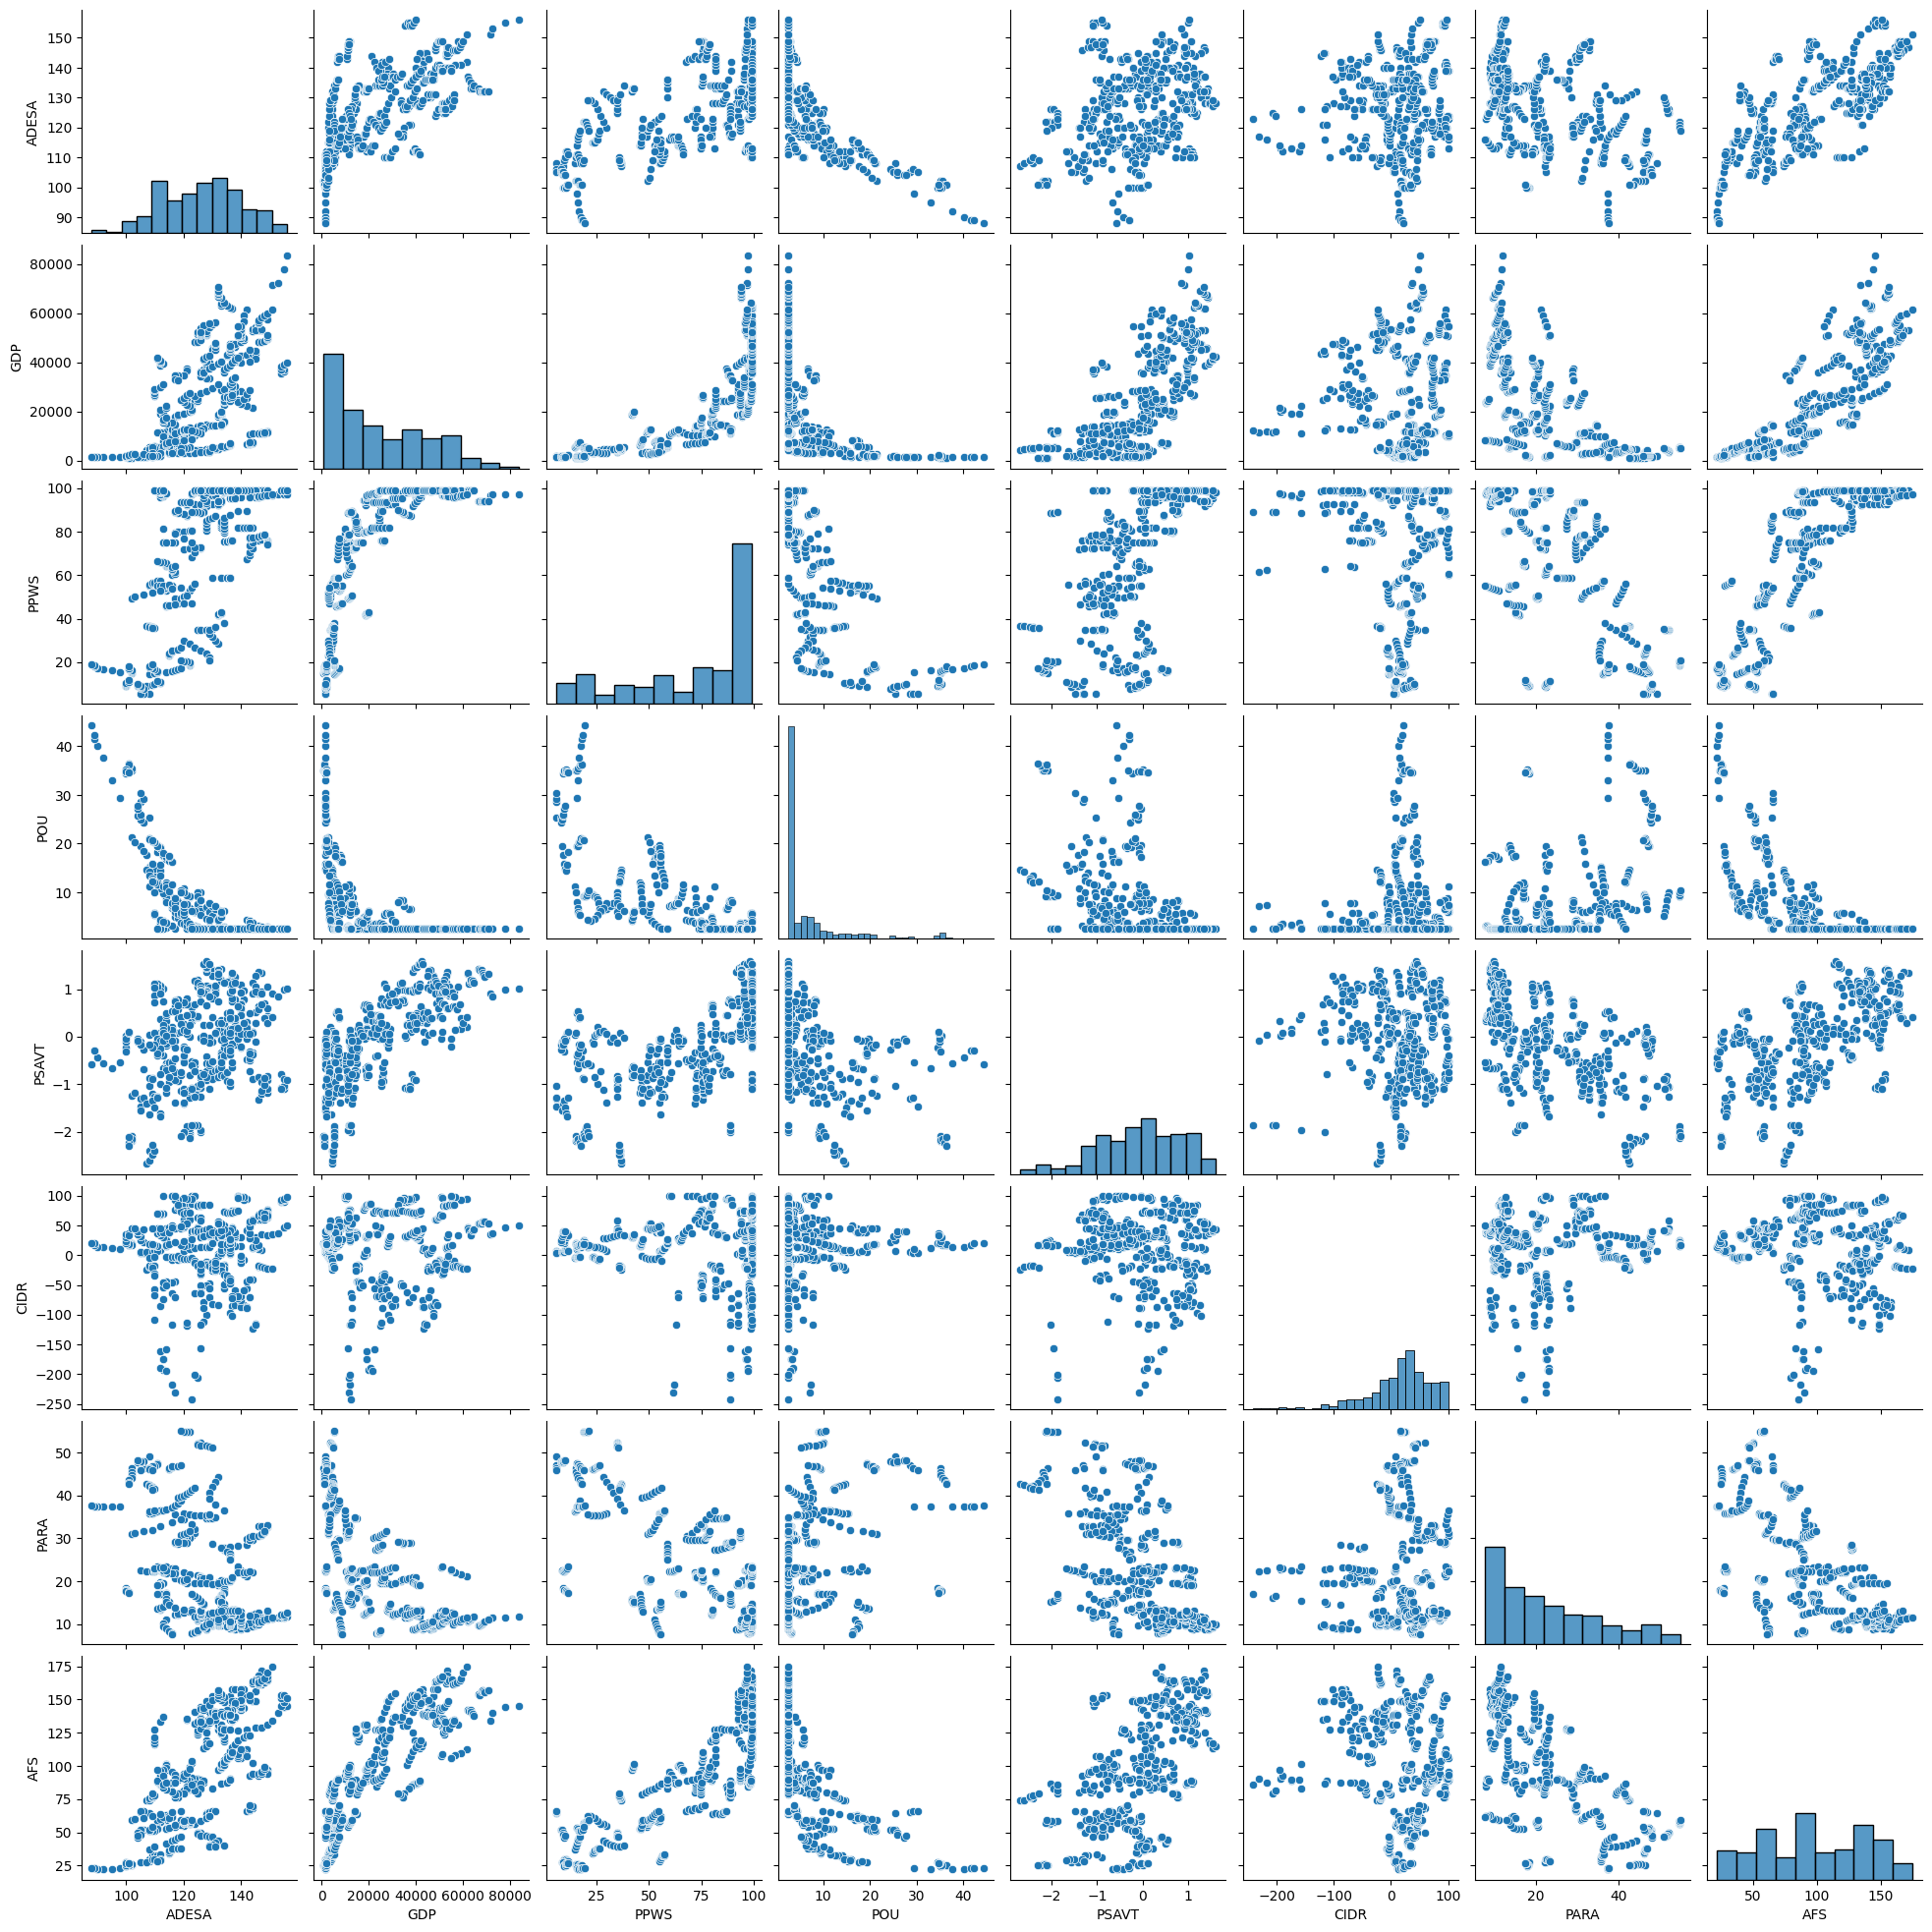

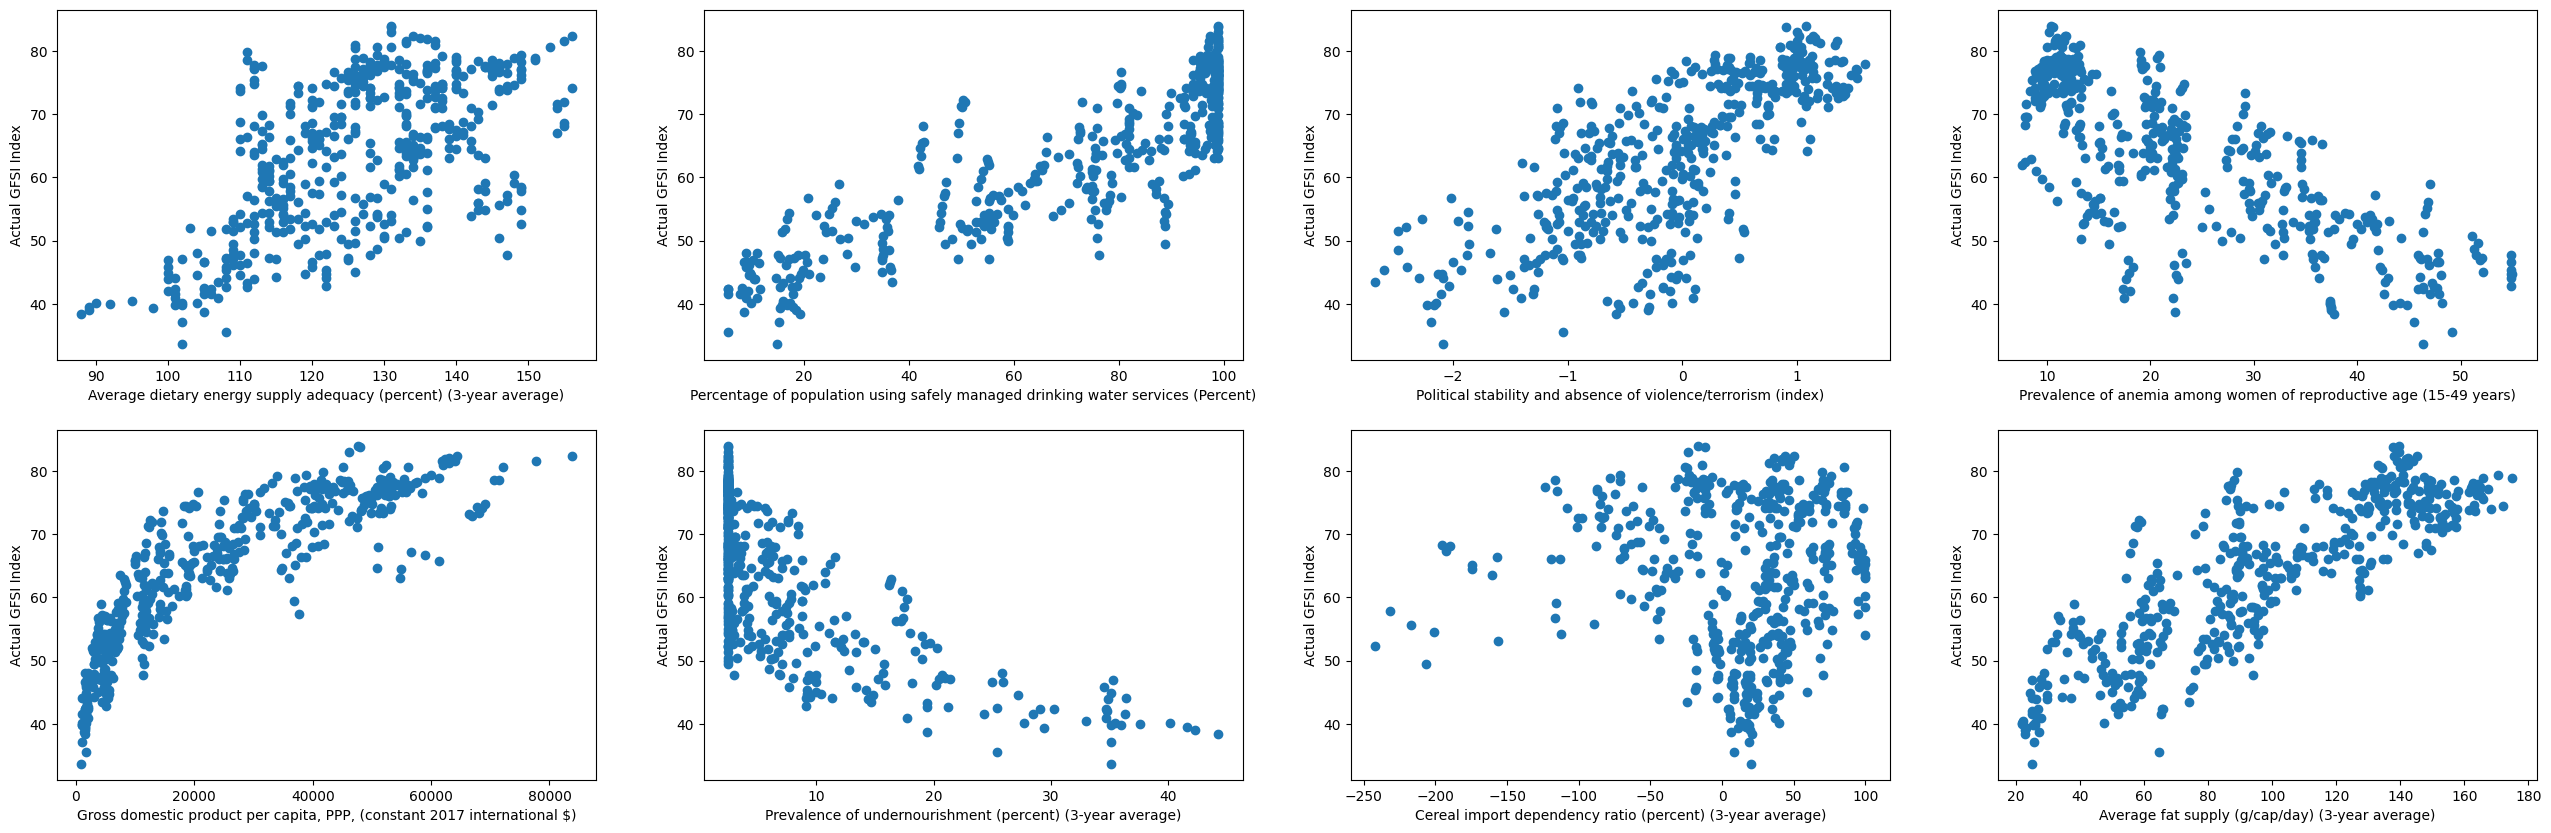

In [3]:
# Combine all country dataframes into one dataframe
df = pd.concat(dataframe_countries.values())
# Convert all values to 'float' and convert '<2.5' data points in POU to 2.5.

# df.columns[1:] as the first column is our 'Country' column
for column in df.columns[1:]:
    df[column] = df[column].apply(lambda x: 2.5 if x == '<2.5' else x).apply(lambda x: float(x) if type(x) is str else x)

df_display = df.dropna(axis=0).reset_index()
# Pair plot every feature against feature
sns.pairplot(df_display.loc[:, chosen_variables].set_axis(axis=1, labels=var_codes))


# Now we plot each feature to the target
split = (2, len(chosen_variables)//2)
fig, axes = plt.subplots(split[0], split[1], figsize=(32, 10))
for k, feature in enumerate(df_display.loc[:, chosen_variables]):
    i, j = k % split[0], k // split[0]
    index = (i, j) if split[1] > 1 else i
    axes[index].scatter(df_display[feature], df_display['Country_Index'])
    axes[index].set(xlabel=feature, ylabel='Actual GFSI Index')

From the graphs, we can summise these few things:
- That there is no obvious linear relationship between each feature from the pair plots plotting each feature against feature.

- That there is some correlation (some almost linear) relationship between each feature and the target.

- That there are no obvous point anomalies.

### Building Model

Our model is a Linear Regression model that attempts to approximate GFSI Index values using features that are representative of the four main dimensions of food security. It is implemented via an object that accepts a cleaned up `pd.Dataframe` with its features and target as columns, and allows for predictions once the model has been fitted.

Our first iteration of the model will be assessed by building up the number of features, using only z-score normalization used to transform the data.

In [4]:
class MLRModel():
    def __init__(self, df, features, target):
        self.df = df
        self.features_names = features
        self.target_name = target
        self.df_features, self.df_target = self._get_features_target()

        # Used in MLRModel.normalize to store the same values used in minmax or zscore normalization
        self.norm_function = None
        self.norm_method = None
        
        # If these are None, prepare_fit has not been called and there is no test/train datasets prepared.
        self.train_set, self.test_set = None, None

        # Used to store beta values and store cost values after MLRModel.fit call.
        self.coefficients = None
        self.cost_values = None

        # Used in MLRModel.predict call, used to store predicted values from the last predict call.
        self.predicted_values = None

        # Calculated coefficient of determinant (r2_), mean-squared error (mse_) and adjusted coefficient of determinant (adj_r2_).
        self.r2_, self.mse_, self.adj_r2_ = None, None, None

    def _get_features_target(self):
        df = self.df.dropna(axis=0).reset_index()
        return pd.DataFrame(df.loc[:, self.features_names]), pd.DataFrame(df.loc[:, self.target_name]) 
    
    def normalize(self, df, norm_method=None, testing=False):

        '''
        For the sake of testing our model with the same normalization application, 
        the mean/std or min/max is saved depending on which norm_method is given.
        '''

        # If testing=True, meaning testing is being down with an external dataframe, 
        # check if the model has internally performed normalization (if self.norm_function exists)
        if testing and self.norm_function and not norm_method:
            return self.norm_function(df)
        
        elif norm_method == 'minmax':
            df_max = df.max(axis=0)
            df_min = df.min(axis=0)
            self.norm_function = lambda x: (x - df_min)/(df_max - df_min)

        elif norm_method == 'zscore':
            df_mean = df.mean(axis=0)
            df_std = df.std(axis=0)
            self.norm_function = lambda x: (x - df_mean)/df_std
        
        else:
            raise ValueError('Either zscore or minmax is expected for MLRModel.normalize')
        
        return self.norm_function(df)
    
    @staticmethod
    def _prepare_features(df):
        # Insert a column of 1s in the front to our Xs.
        df.insert(0, '-', 1)
        return df.to_numpy()
    
    @staticmethod
    def _compute_cost(X, y, beta):
        # Compute cost according to formula
        y_hat = X @ beta
        y_hat_minus_y = y_hat - y
        m = X.shape[0]
        J = 1 / (2 * m) * y_hat_minus_y.T @ y_hat_minus_y
        return J[0,0]
    
    def _split(self, test_size, df_features, df_target):
        indexes = df_features.index
        k = int(len(indexes) * test_size)
        # Select indexes of rows that are for testing
        test_index = set(np.random.choice(indexes, size=k, replace=False))
        # The difference between indexes and test_index are indexes of rows for training
        train_index = set(indexes) - test_index
        test_index, train_index = list(test_index), list(train_index)
        df_features_train = df_features.iloc[train_index, :]
        df_features_test = df_features.iloc[test_index, :]
        df_target_train = df_target.iloc[train_index, :]
        df_target_test = df_target.iloc[test_index, :]
        
        return df_features_train, df_features_test, df_target_train, df_target_test
    
    def _gradient_descent(self, beta, alpha, num_iters):
        # X contains matrix of features, y contains actual y_values, J is a list to store cost values after each iteration
        X, y = self.train_set
        J = []
        for i in range(num_iters):
            # Predicted y_values
            y_hat = X @ beta
            # Predicted y_values minus actual y_values 
            y_delta = y_hat - y
            # M is the number of data points
            M = X.shape[0]
            
            # Update the beta according to formula 
            beta = beta - alpha * 1/M * X.T @ y_delta
            curr_cost_value = 1/(2 * M) * y_delta.T @ y_delta
            J.append(curr_cost_value[0, 0])
        
        return beta, J

    # Function to reset any transformations made to the model's copies of df_features and df_target
    def reset_features_target(self):
        self.df_features, self.df_target = self._get_features_target()

    def apply_func(self, features_to_transform, func):
        for feature in features_to_transform:
            # If the feature name is in the df, apply the function to the feature
            if feature in self.features_names:
                self.df_features[feature] = self.df_features[feature].apply(func)

    # This function is meant to create our test/train sets
    def prepare_fit(self, random_state=100, test_size=0.3, norm_method='zscore'):
        # Set np.random.seed() for testing purposes
        np.random.seed(random_state)
        # Split up our features and targets into test/train sets
        df_features_train, df_features_test, df_target_train, df_target_test = self._split(test_size, self.normalize(self.df_features, norm_method), self.df_target)

        # Prepare features, assign to train_set and test_set
        self.train_set = self._prepare_features(df_features_train), df_target_train.to_numpy()
        self.test_set = self._prepare_features(df_features_test), df_target_test.to_numpy()

    def fit(self, alpha=0.01, num_iters=1500):
        # If prepare_fit has not be called, meaning self.test_set or self_train_set does not exist;
        if self.train_set is None or self.test_set is None:
            raise Exception('Train/test set is not prepared yet. Call MLRModel.prepare_fit() first.')
        
        # M is the number of features
        M = len(self.features_names)
        beta = np.zeros((M + 1, 1))
        self.coefficients, self.cost_values = self._gradient_descent(beta, alpha, num_iters)

    def predict(self, test_set=None):
        # If test_set is None, then prediction is made on the model's internal test_set
        test_features, y_actual = self.test_set if test_set is None else test_set

        # Store predicted values
        self.predicted_values = test_features @ self.coefficients

        # Store actual y mean
        y_mean = y_actual.mean(axis=0)
        # Actual y_values minus predicted y_values (Residuals)
        y_delta = y_actual - self.predicted_values
        RSS = y_delta.T @ y_delta

        # Actual y_values minus actual y mean 
        y_actual_mean_delta = y_actual - y_mean
        TSS = y_actual_mean_delta.T @ y_actual_mean_delta
        
        # N is number of target values
        N = y_actual.shape[0]
        # M is the number of features
        M = len(self.features_names)
        r2_ = 1 - RSS/TSS
        mse_ = 1/M * RSS
        # Calculated adjusted r2_ with formula as given above.
        adj_r2_ = 1 - (1 - r2_) * (N - 1) / (N - M - 1)

        self.r2_, self.mse_, self.adj_r2_ = r2_[0][0], mse_[0][0], adj_r2_[0][0]

    def display_result(self, test_set=None):
        # If test_set is None, then last prediction is made on the model's internal test_set
        features, target = self.test_set if test_set is None else test_set

        n = len(self.features_names)
        split = (2, (n+1)//2)
        fig, axes = plt.subplots(split[0], split[1], figsize=(32, 10))

        # This is to deploy each graph of feature against predicted target/actual target in a subplot
        for (k, feature) in enumerate(self.features_names):
            i = k % split[0]
            j = k // split[0]

            index = (i,j) if split[1] > 1 else i
            axes[index].scatter(features[:, k+1], self.predicted_values)
            axes[index].scatter(features[:, k+1], target)
            axes[index].set(xlabel=feature, ylabel=self.target_name)
            
        print(f'Adjusted R² {self.adj_r2_}')

### Evaluating the Model

To determine how well the model predicts an outcome, we will be using the Adjusted $r^2$ ($r^2_\text{adj}$) coefficient of determinant that takes into account the number of features used in the model. It compensates for the addition of features beyond the first and only increases if the new feature enhances the model above what would be obtained by probability. 

$$r^2_\text{adj} = 1 - (1 - r^2)\left(\frac{n-1}{n-m-1}\right)$$

<div style='margin-left:25px'>
    where
    <p style='margin-left:25px'>
        <i>n</i> is the number of data points
    </p>
    <p style='margin-left:25px'>
        <i>m</i> is the number of features
    </p>
</div>

The criterion used to determine the usefulness of each feature, is the difference in $r^2_\text{adj}$ value between the model with n features and the model with $(n+1)$ features. If the feature is useful, $\left(r^2_{\text{adj}, n-1} - r^2_{\text{adj}, n}\right) > 0$.

In [5]:
'''
Further clean-up is done on the dataframe, all NaNs are dropped so that every data point for each feature is present for a country and Y20XX. 
The indexes are also reset thereafter.
'''
# To assess the usefulness of each feature, features are loaded onto a model one by one, and the adj_r2_ values are recorded.
def get_r2_(model):
    model.prepare_fit()
    model.fit()
    model.predict()
    return model.adj_r2_

# List to store adj_r2 values and variable added on each iteration
def r2_iterative(features):
    df_display = {
                    'Iterations': [],
                    'Nth_model_r2': [],
                    'r2_delta': [None],
                    'Percentage_inc': [None],
                    'Feature_added': []
                }
    m = len(features)
    for i in range(m-1, -1, -1):
        model = MLRModel(df=df, features=features[i:], target='Country_Index')
        df_display['Iterations'].append(m-i)
        df_display['Nth_model_r2'].append(round(get_r2_(model), 3))
        df_display['Feature_added'].append(features[i])

    # Now to calculate adj_r2 of n+1 variables model - adj_r2 of n variables model
    for n in range(m-1):
        adj_r2_n_plus_1 = df_display['Nth_model_r2'][n+1]
        adj_r2_n = df_display['Nth_model_r2'][n]
        diff_ = adj_r2_n_plus_1 - adj_r2_n
        percentage_increase = round((adj_r2_n_plus_1 - adj_r2_n) / adj_r2_n * 100, 3)
        df_display['r2_delta'].append(diff_)
        df_display['Percentage_inc'].append(percentage_increase)
        
    return pd.DataFrame(df_display)
    
display(r2_iterative(chosen_variables))


,Iterations,Nth_model_r2,r2_delta,Percentage_inc,Feature_added
0,1,0.712,NaN,NaN,Average fat supply (g/cap/day) (3-year average)
1,2,0.766,0.054,7.584,Prevalence of anemia among women of reproducti...
2,3,0.761,-0.005,-0.653,Cereal import dependency ratio (percent) (3-ye...
3,4,0.818,0.057,7.490,Political stability and absence of violence/te...
4,5,0.853,0.035,4.279,Prevalence of undernourishment (percent) (3-ye...
5,6,0.865,0.012,1.407,Percentage of population using safely managed ...
6,7,0.877,0.012,1.387,"Gross domestic product per capita, PPP, (const..."
7,8,0.884,0.007,0.798,Average dietary energy supply adequacy (percen...


The results are displayed here as follows for easier following:

| Iterations | $n^\text{th}$ model $r^2_\text{adj}$ | $r^2_{\text{adj},n} - r^2_{\text{adj},(n-1)}$ | % Increase | Feature Added On $n^\text{th}$ Iteration |
|---|---------|-----------------|---|---|
| 1 | 0.712 | None | None | AFS |
| 2 | 0.766 | 0.054 | 7.584% | PARA |
| 3 | 0.761 | -0.04 | -0.653% | CIDR |
| 4 | 0.818 | 0.057 | 7.49% | PSAVT |
| 5 | 0.853 | 0.035 | 4.279% | POU |
| 6 | 0.865 | 0.013 | 1.407% | PPWS |
| 7 | 0.877 | 0.012 | 1.387% | GDP |
| 8 | 0.884 | 0.007 | 0.798% | ADESA |

Looking at the results, we have two insights:
1. That in the third iteration, where the feature - Cereal import dependency ratio (percent) (3-year average) [CIDR] - was added, the feature is determined by our metrics to be a non-useful addition to the model as $r^2_\text{adj}$ only increases if the new feature enhances the model above what would be obtained by probability. 
2. We also see that in the subsequent iterations, further additions to $r^2_\text{adj}$ taper off in terms of percentage increase in $r^2_\text{adj}$. We will do further iterations of the `r2_iterative` function with a randomized set of features each time to try to optimise this.


By shuffling the list of chosen variables and running `r2_iterative` 20 times, we get the mean percentage increase of $r^2_\text{adj}$ at each iteration. 

In [6]:
# Removing CIDR from chosen_variables list
variable_ls = chosen_variables[:5] + chosen_variables[6:]
df_eval = pd.DataFrame()
# Repeating r2_iterative 20 more times, shuffling variable_ls each time
for i in range(20):
    np.random.shuffle(variable_ls)
    df_eval = pd.concat([df_eval, r2_iterative(variable_ls)])
per_inc_mean_ls = []
for i in range(2, 8):
    per_inc_mean_ls.append(df_eval[df_eval.Iterations == i].loc[:, 'Percentage_inc'].dropna(axis=0).mean(axis=0))

[42.5168, 5.523, 5.3458, 2.1298000000000004, 1.4228, 0.8540000000000001]


Text(0, 0.5, 'Percentage Increase (%)')

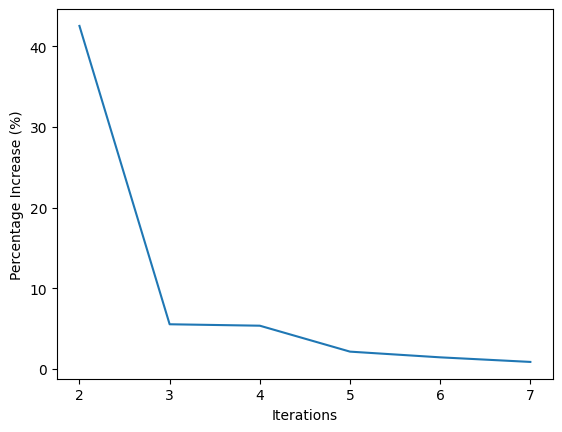

In [7]:
print(per_inc_mean_ls)
plt.plot([2, 3, 4, 5, 6, 7], per_inc_mean_ls)
plt.xlabel('Iterations')
plt.ylabel('Percentage Increase (%)')

With these results, we see that percentage increases in $r^2_\text{adj}$ drops dramatically after the 2nd iteration, with less than 10% increases in $r^2_\text{adj}$ from the 3rd iteration and less than 2% after the 5th iteration. From a practical standpoint, humanitarian organizations would be able to save more time and resources from gathering data if there were only 4-5 sets of data to obtain. Hence, our model is revised to be a 5 variable model while remaining representative of the four main dimensions.

| Availability | Access | Utilization | Stability |
|--------------|--------|-------------|-----------|
| Average dietary energy supply adequacy (percent) (3-year average)<br>[ADESA] | Gross domestic product per capita, PPP, (constant 2017 international $)<br>[GDP] | Prevalence of undernourishment (percent) (3-year average)<br>[POU] | Political stability and absence of violence/terrorism (index)<br>[PSAVT] |
| | Percentage of population using safely managed drinking water services (Percent) <br>[PPWS] | | |

Adjusted R² 0.8646882265040045


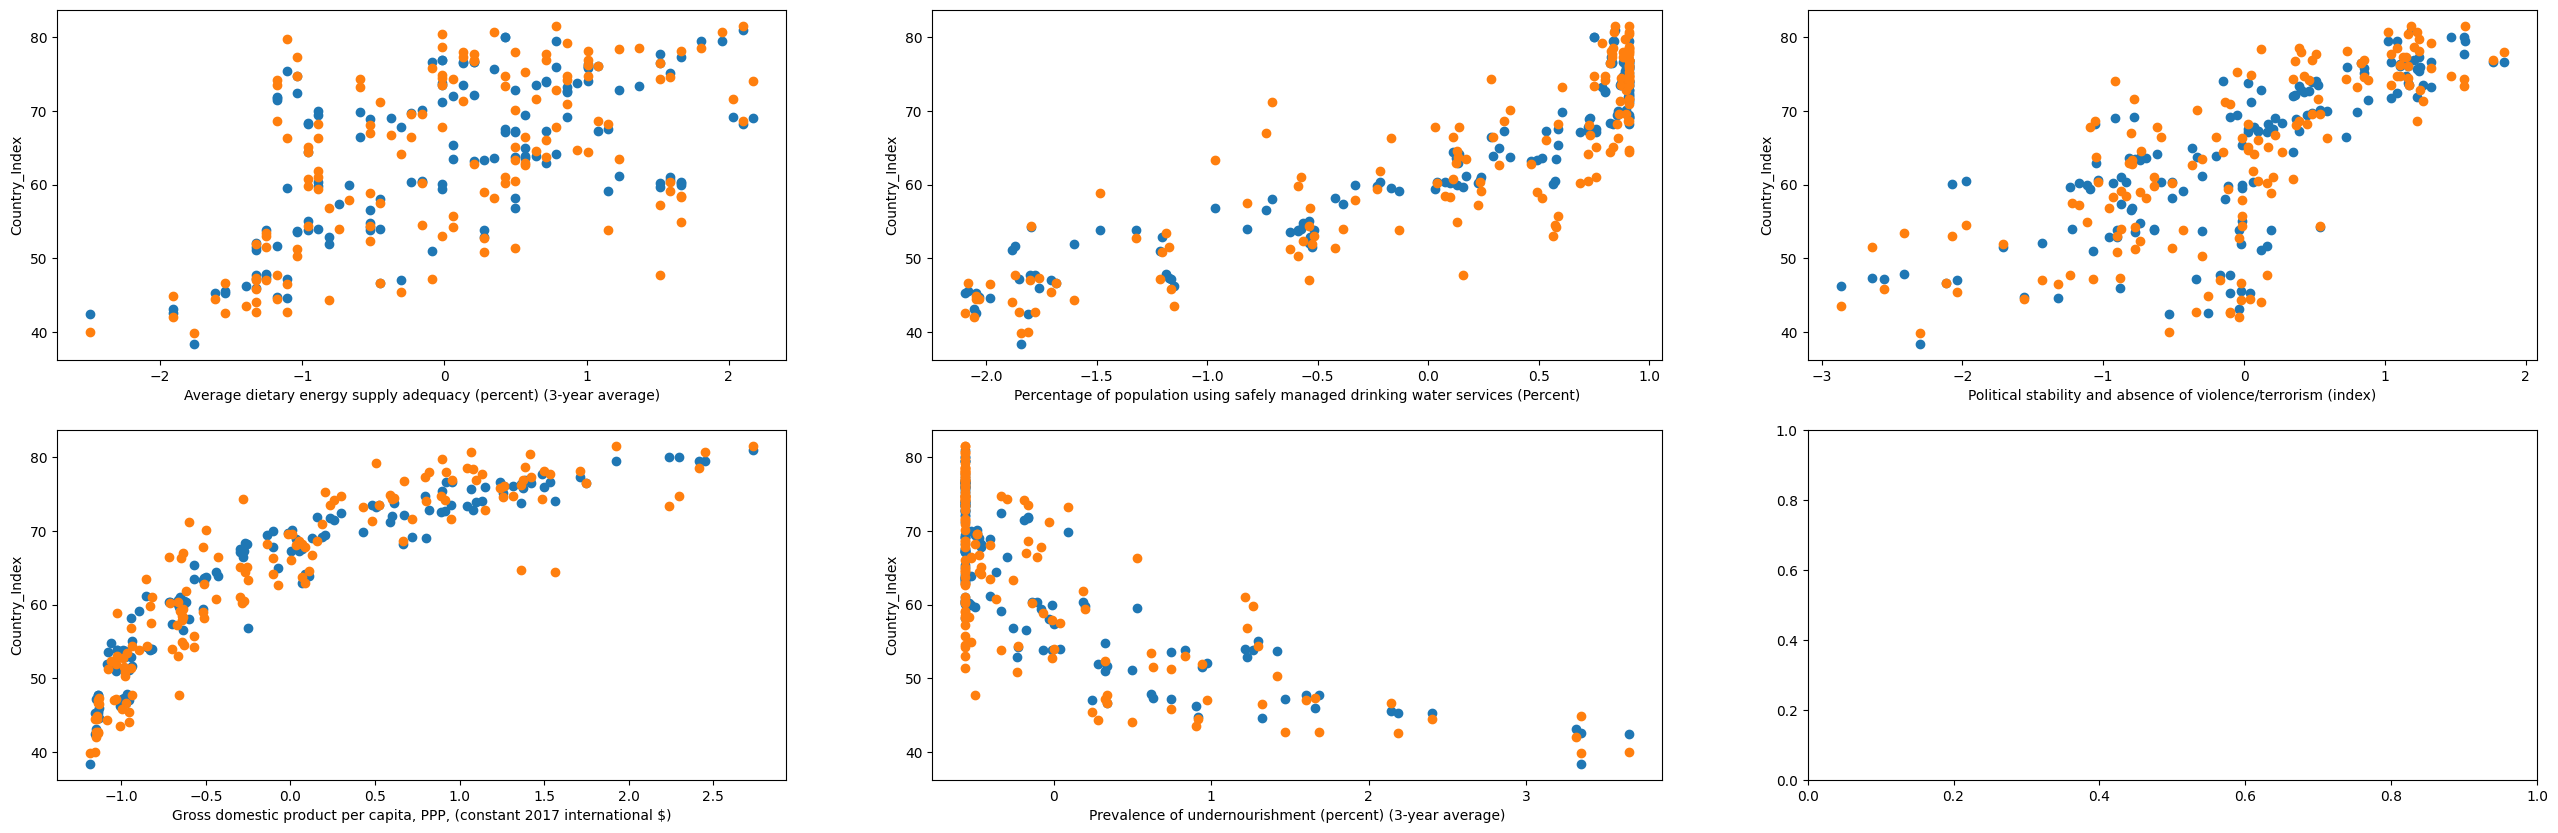

In [8]:
features_codes = ['ADESA', 'GDP', 'PPWS', 'POU', 'PSAVT']
five_feature_names = [var_code_dict[code] for code in features_codes]
model = MLRModel(df=df, features=five_feature_names, target='Country_Index')
model.prepare_fit()
model.fit()
model.predict()
model.display_result()

The bottom-right graph is meant to be blank.

### Improving the Model

Discuss any steps you can do to improve the models. Put any python codes. You can repeat the steps above with the codes to show the improvement in the accuracy. 

Our current 5 variable model is done with only z-score normalization applied to the features. 

We will look towards improving the model by again looking at 
1. Applying better data transformations
2. Optimising number of iterations and learning rate in gradient descents

From displayed result above, we see that Gross domestic product per capita, PPP (constant 2017 international $) [GDP] is distributed with a left-skew.

Hence, we will apply the following transformations on GDP.

Adjusted R² 0.8804722144862522
Adjusted R² 0.8767508498969435


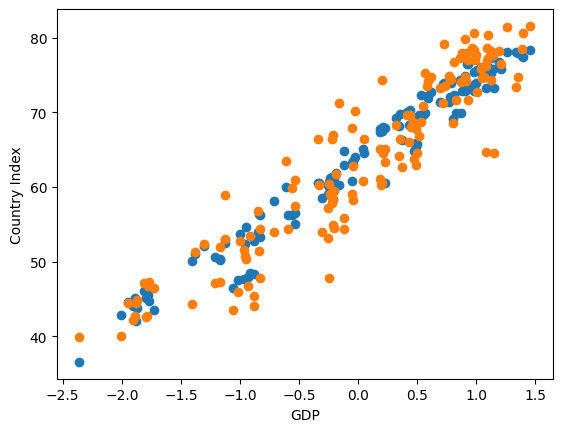

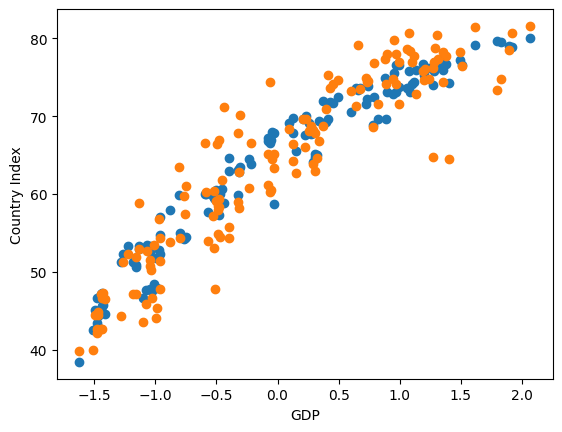

In [9]:
# Transformation functions for ln and sqrt as it is left-skew distributed, GDP, PPWS
sqrt_transformation = lambda x: x**(1/2)
ln_transformation = lambda x: np.log(x)

# We will do the transform the feature by feature to check for the usefulness of the transformation visually and empirically (by r2)
def trans_and_plot(df, transformation, feat_code):
    # Get the name of feature per code
    feat = var_code_dict[feat_code]
    
    model = MLRModel(df, features=five_feature_names, target='Country_Index')
    model.apply_func(features_to_transform=[feat], func=transformation)
    model.prepare_fit()
    model.fit()
    model.predict()
    
    # Get Index of feature stored in model
    k = model.features_names.index(feat)
    GDP_features = model.test_set[0][:, k+1]
    actual_target = model.test_set[1]
    pred_target = model.predicted_values
    fig, ax = plt.subplots()

    ax.scatter(x=GDP_features, y=pred_target)
    ax.scatter(x=GDP_features, y=actual_target)
    ax.set(xlabel=feat_code, ylabel='Country Index')
    print(f'Adjusted R² {model.adj_r2_}')
    
# Results for GDP
trans_and_plot(df, ln_transformation, 'GDP')
trans_and_plot(df, sqrt_transformation, 'GDP')



Looking at the results we have gathered:

| Original $r^2_\text{adj}$ | Transformed GDP $r^2_\text{adj}$ ($\ln(x)$) | Transformed GDP $r^2_\text{adj}$ ($\sqrt{x}$) |
|---|---|---|
| 0.865 | 0.880 | 0.877 |
| $\pm$ | 0.015 | 0.012 | 


- For GDP, we have experienced a better adjusted $r^2_\text{adj}$ with both $\ln(x)$ and $\sqrt{x}$ transformations. This shows that the GDP is better modelled after the target with these transformations and as seen from the graph, the relationship between GDP and the target is now more linear.

Applying these results, we will do a $\ln(x)$ transformation on GDP for our next iteration of the model.

Adjusted R² 0.8804722144862522


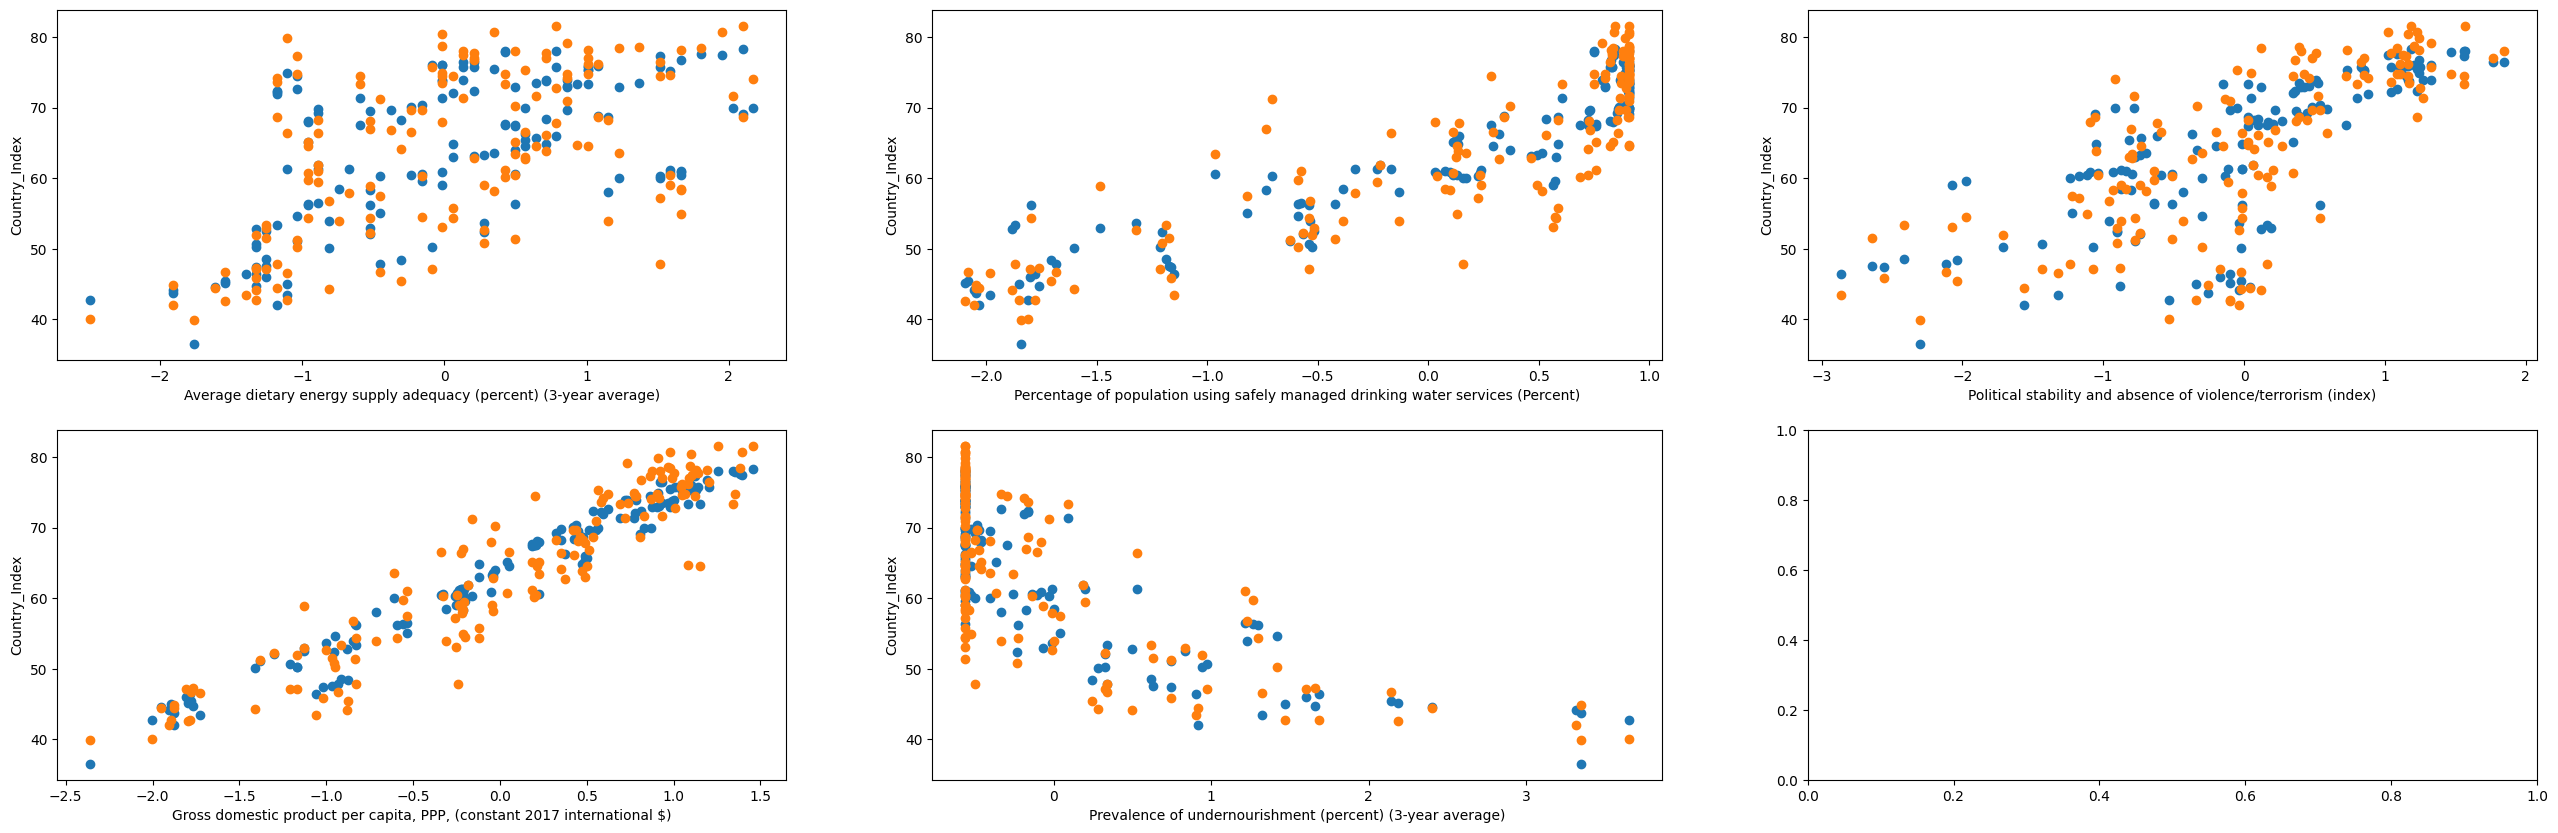

In [10]:
model.apply_func(features_to_transform=[var_code_dict['GDP']], func=ln_transformation)
model.prepare_fit()
model.fit()
model.predict()
model.display_result()

The bottom-right graph is meant to be blank.

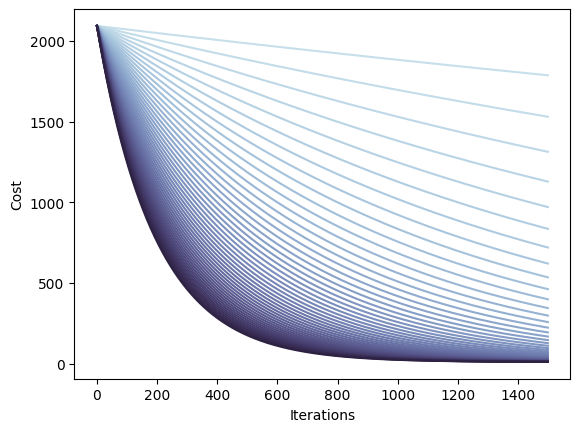

In [11]:
# Keeping num_iters constant, we set intial_alpha = 0.00005
sns.set_palette(sns.color_palette(n_colors=51, palette="ch:s=.25,rot=-.25"))
intial_alpha = 0.00005
experimental_model = MLRModel(df=df, features=five_feature_names, target='Country_Index')
experimental_model.prepare_fit()
for i in range(1, 51):
    experimental_model.fit(alpha=intial_alpha*i)
    experimental_model.predict()
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    sns.lineplot(data=experimental_model.cost_values)


$\alpha \in [0.00005, 0.0025]$.


As we can see from the graph, when we keep the number of iterations constant as the learning rate ($\alpha$) increases (shown when the colour gradient becomes a darker hue), the cost reaches a minimum eventually after a certain number of iterations. However, we do not know fully the relationship between the number of iterations and the learning rate to be able to fully optimise the effects of these variables to the model.


Through research, optimising number of iterations and learning rate in gradient descent requires further complicated, advanced optimisation techniques. Empirically, we have decided that the gains in optimising the number of iterations and learning rate in gradient descent to the accuracy of the model is miniscule. Hence, we will leave it to possible future improvements to be made.

### Discussion and Analysis

To summarize, our final iteration of the model uses a set of 70 countries, with 5 variables that are representative of the four main dimensions of food security as defined above. It is a relatively accurate predictive model, with a $r^2_\text{adj}$ of 0.880 while using only 5 variables as compared to GFSI's >20 set of indicators and complex methodology. While it is not meant for or qualified to be a full replacement for GFSI's predictive model, it can allow for organizations like FAO to make early estimates of a country or region's level of food security to identify, assess and prioritize. 


It is also a robust model, as we shall see when we use the 2020 dataset to predict the GFSI Indices for each country.  

Adjusted R² 0.8609230393530888


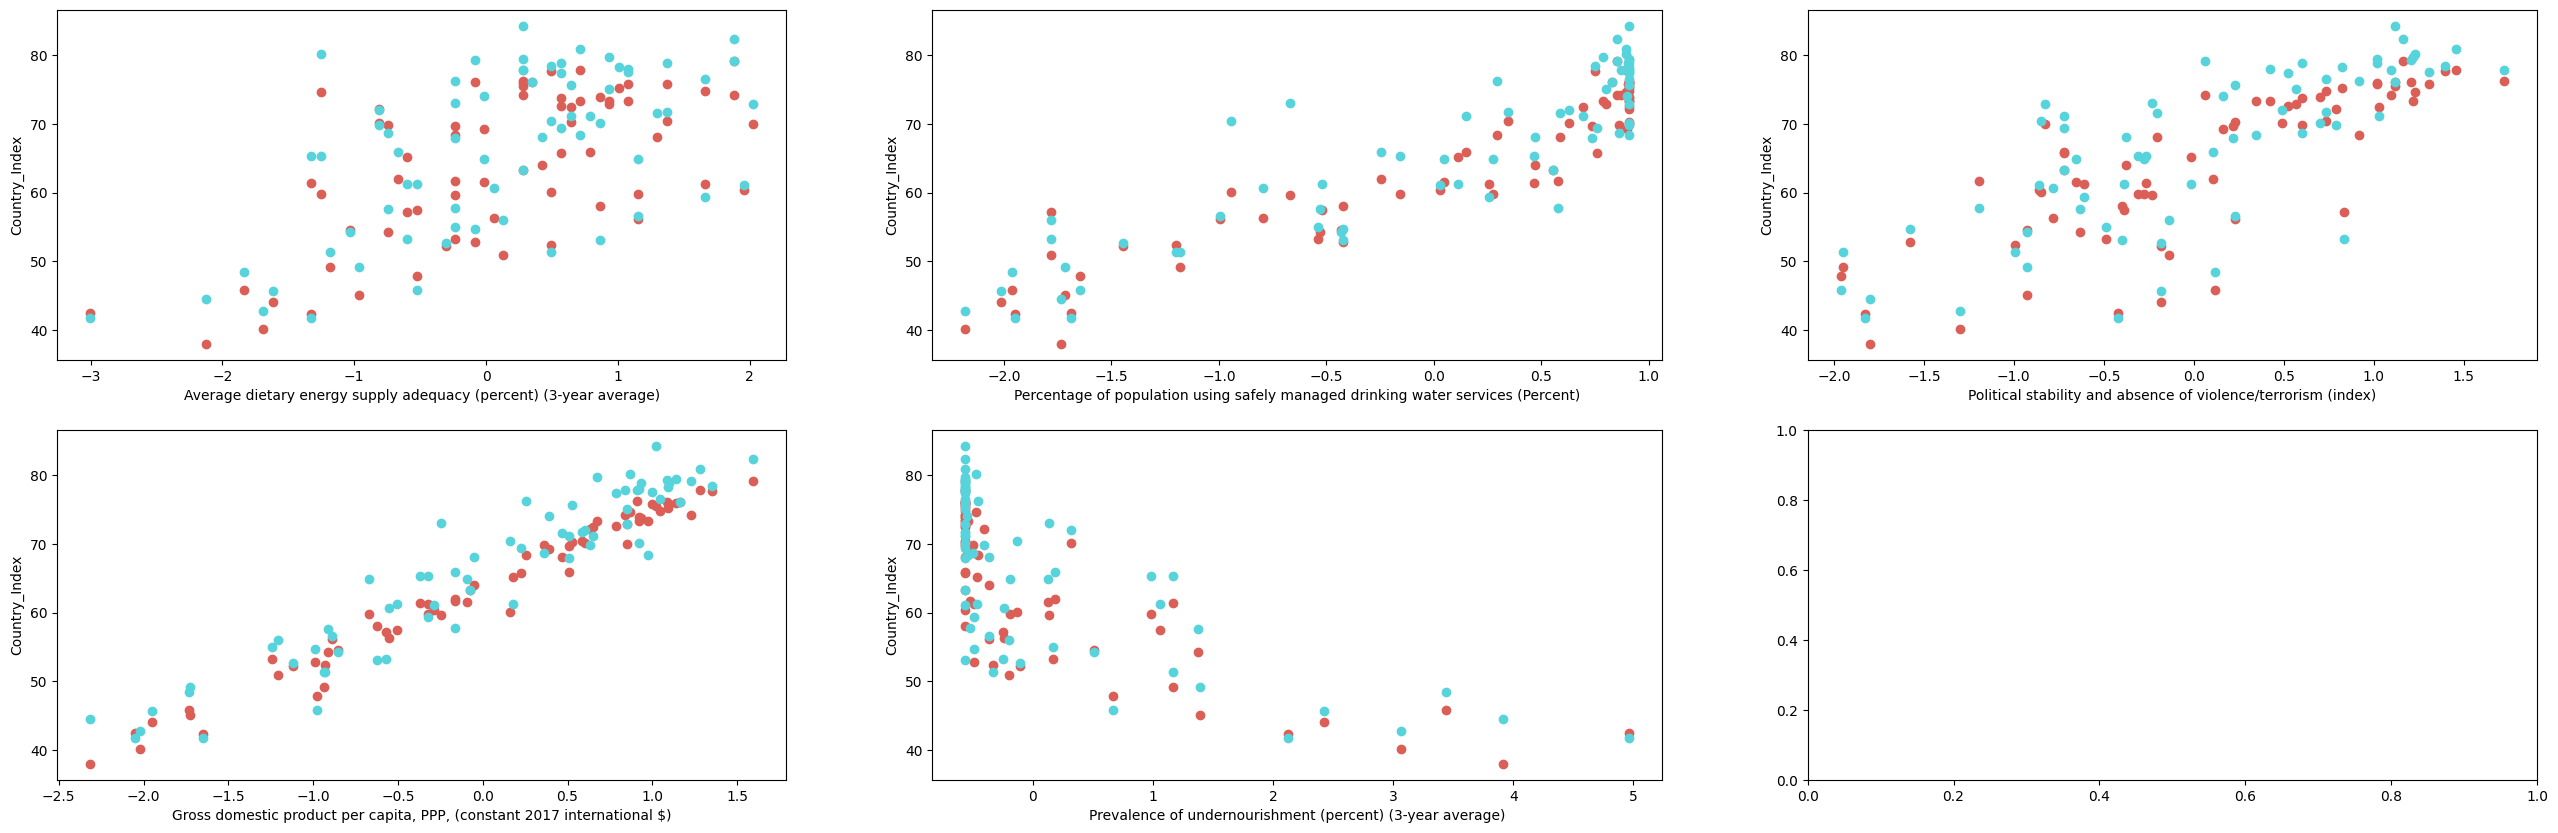

In [12]:
sns.set_palette(sns.color_palette(palette='hls', n_colors=2))

df_2020 = df.loc['Y2020', five_feature_names + ['Country_Index']].dropna(axis=0).reset_index()

# Prepare features by inserting a column of 1s
df_2020[var_code_dict['GDP']] = df_2020[var_code_dict['GDP']].apply(ln_transformation)
features = model.normalize(df_2020.loc[:, five_feature_names], testing=True)
features = model._prepare_features(features)

# Apply ln function to GDP
test_set = (features, df_2020.loc[:, ['Country_Index']].to_numpy())
model.predict(test_set)
model.display_result(test_set)

Due to the COVID-19 pandemic, there was a big impact on the global supply chain of many state of affairs around the world, of which the scale and impact is still be researched today. As such, we did not include it in the training dataset. To test for robustness of our model, we run the model on the 2020 values. As a result, we get an $r^2_\text{adj}$ of 0.861, which marked a decrease from the original $r^2_\text{adj}$ which shows that its accuracy has decreased. In conclusion, our model is useful for its purpose, but may be limited in its usefulness if we use datasets from the later years beyond 2019.

### References 


1. Economist Impact. *Global Food Security Index 2022*. Sept. 2022. URL:
  https://impact.economist.com/sustainability/project/food-security-index/download-the-index.

2. Food and Argiculture Organization of the United Nations. *An
  Introduction to the Basic Concepts of Food Security*. 2008. URL:
  https://www.fao.org/3/al936e/al936e00.pdf.

3. Food and Agriculture Organization of the United Nations. *Faostat bulk
  download.* `Food Security Data E All Data NOFLAG.csv` file was used
  from the bulk download. Nov. 2022. URL:
  https://www.fao.org/faostat/en/#home.